# Data Preprocessing

Для того что бы подготовить наш датасет к дальнейшим исследованиям, загрузим сначала библиотеки которые нам пригодятся для подготовки. 

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
df = pd.read_csv('insurance_claimsV1.csv', sep=',')

Загружаем наг датасет. Для наглядности выведем импортрованнные данные на экран; убедимся, что всё загрузилось должным образом. 

Итак, имеем 39 стобцов переменных по 39000 строк записей.

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [18]:
#Прежде чем начать подготовку датасета к предстоящейму анализу избавимся от переменных которые не несут в себе смысловой информации, которая влияла бы на прогнозы далее. Было принято решение удалить следующие переменные: 
insured_zip,policy_number,auto_model,incident_state,incident_date,incident_location,policy_state. Это качественные переменные которые характеризует сам инцидент. 

In [4]:
df = df.drop(['insured_zip','policy_number','auto_model','incident_state','incident_date','incident_location','policy_state',], axis='columns', inplace=False)
df.head(5)

,months_as_customer,age,policy_bind_date,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,2014-10-17,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,2006-06-27,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,0,NaN,5070,780,780,3510,Mercedes,2007,Y
2,134,29,2000-09-06,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,1990-05-25,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,2014-06-06,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,0,1,NO,6500,1300,650,4550,Accura,2009,N


Выведем статистику по числовым переменным, где сразу увидим, что в покрайней мере в переменной police_report_available имеются пропущенные значения. Для того что бы далее получить адекватные модели и прогнозы, нам нужно будет избавиться от пропущенных значений в датасете. 

In [5]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Для того что бы проверить в каких переменных присутсвуют пропуски, запустим команду которая находится ниже. Она покажет общее количество пропущенных значений для каждой переменной.

Как видим пропущенные значения присутсвуют в трех переменных, чего не было показано в статистике по числовым переменным.
Переменная property_damage имеет в общей сумме 360 пропущенныз значений, что составляет 0,36% от общей суммы значений. Соотвественно police_report_avaialble имеет 343 пропущенных значений, что составляет 0,343% и collision_type имеет 178 пропущенных значений, что составляет 0,178%. 


In [7]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
property_damage,360,0.360
police_report_available,343,0.343
collision_type,178,0.178
months_as_customer,0,0.000
authorities_contacted,0,0.000
auto_year,0,0.000
auto_make,0,0.000
vehicle_claim,0,0.000
property_claim,0,0.000
injury_claim,0,0.000


Согласно полученным данным, пропущенные данные имеются только в качественных переменных. Соотвественно, нам нужно избавиться от них. Для этого используем метод заполнения most frequent - самые частые. С помощью этого метода будут отобраны наиболее часто встречающиеся ответа, пропуски будут заполнены этим. 

In [8]:
# Function Missing data (non-numeric)
def fill_missing_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:        
        prep_fr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        prep_fr.fit(x[char_var])
        x[char_var] = prep_fr.transform(x[char_var])
    return(x)

Записываем в наш датафрейм уже очищенные данные.

In [9]:
# Filling NA 
from sklearn.impute import SimpleImputer
df = fill_missing_char(df)

Повторно делаем проверку, которая указывает на отсутствие пропусков в данных.

In [10]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
months_as_customer,0,0.0
age,0,0.0
auto_year,0,0.0
auto_make,0,0.0
vehicle_claim,0,0.0
property_claim,0,0.0
injury_claim,0,0.0
total_claim_amount,0,0.0
police_report_available,0,0.0
witnesses,0,0.0


In [11]:
df

,months_as_customer,age,policy_bind_date,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,2014-10-17,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,2006-06-27,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,0,NO,5070,780,780,3510,Mercedes,2007,Y
2,134,29,2000-09-06,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,1990-05-25,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,2014-06-06,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,0,1,NO,6500,1300,650,4550,Accura,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,0,1,NO,87200,17440,8720,61040,Honda,2006,N
996,285,41,2014-01-05,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,2,3,NO,108480,18080,18080,72320,Volkswagen,2015,N
997,130,34,2003-02-17,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,2,3,YES,67500,7500,7500,52500,Suburu,1996,N
998,458,62,2011-11-18,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,0,1,YES,46980,5220,5220,36540,Audi,1998,N


In [11]:
# Cheking categorical data. Поскольку наш датасет содержит качественные переменныые какждая из которых имеет по несколько уникальных признаков,на необходимо их закодировать. 
dfs = df[['insured_sex','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','property_damage','police_report_available','auto_make','fraud_reported','policy_csl','insured_education_level']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
8,property_damage,2,"[YES, NO]",object
12,policy_csl,3,"[250/500, 100/300, 500/1000]",object
9,police_report_available,2,"[YES, NO]",object
0,insured_sex,2,"[MALE, FEMALE]",object
3,insured_relationship,6,"[husband, other-relative, own-child, unmarried...",object
1,insured_occupation,14,"[craft-repair, machine-op-inspct, sales, armed...",object
2,insured_hobbies,20,"[sleeping, reading, board-games, bungie-jumpin...",object
13,insured_education_level,7,"[MD, PhD, Associate, Masters, High School, Col...",object
4,incident_type,4,"[Single Vehicle Collision, Vehicle Theft, Mult...",object
6,incident_severity,4,"[Major Damage, Minor Damage, Total Loss, Trivi...",object


In [12]:
# Encoding
pd = {'NO':0,'YES':1}
pc = {'250/500':0,'100/300':1,'500/1000':2}
pra = {'NO':0,'YES':1}
ins = {'MALE':0,'FEMALE':1}
inr = {'husband':0,'other-relative':1,'own-child':2,'unmarried':3}

ino = {'machine-op-inspct':0,'prof-specialty':1,'tech-support':2,'adm-clerical':3,'armed-forces':3,'craft-repair':3,'exec-managerial':3,'farming-fishing':3,'handlers-cleaners':3,'other-service':3,'priv-house-serv':3,'protective-serv':3,'sales':3,'transport-moving':3}

inh = {'reading':0,'paintball':1,'bungie-jumping':2,'camping':3,'chess':3,'cross-fit':3,'dancing':3,'exercise':3,'golf':3,'hiking':3,'kayaking':3,'movies':3,'polo':3,'skydiving':3,'video-games':3,'yachting':3}
inel = {'Associate':0,'College':1,'High School':2,'JD':3,'Masters':3,'MD':3,'PhD':3}
inty = {'Single Vehicle Collision':0,'Vehicle Theft':1,'Total Loss':2,'Trivial Damage':3}
inse = {'Major Damage':0,'Minor Damage':1,'Total Loss':2,'Trivial Damage':3}
fr = {'N':0,'Y':1}
colt = {'Side Collision':0,'Rear Collision':1,'Front Collision':2}
aum =  {'Dodge':0,'Saab':1,'Suburu':2,'Accura':3,'Audi':3,'BMW':3,'Chevrolet':3,'Ford':3,'Honda':3,'Jeep':3,'Mercedes':3,'Nissan':3,'Toyota':3,'Volkswagen':3}
authc = {'Police':0,'None':1,'Fire':2,'Other':3,'Ambulance':4}

df['property_damage'] = df['property_damage'].map(pd)
df['policy_csl'] = df['policy_csl'].map(pc)
df['police_report_available'] = df['police_report_available'].map(pra)
df['insured_sex'] = df['insured_sex'].map(ins)
df['insured_relationship'] = df['insured_relationship'].map(inr)
df['insured_occupation'] = df['insured_occupation'].map(ino)
df['insured_hobbies'] = df['insured_hobbies'].map(inh)
df['insured_education_level'] = df['insured_education_level'].map(inel)
df['incident_type'] = df['incident_type'].map(inty)
df['incident_severity'] = df['incident_severity'].map(inse)
df['fraud_reported'] = df['fraud_reported'].map(fr)
df['collision_type'] = df['collision_type'].map(colt)
df['auto_make'] = df['auto_make'].map(aum)
df['authorities_contacted'] = df['authorities_contacted'].map(authc)

In [13]:
df

,months_as_customer,age,policy_bind_date,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,2014-10-17,0,1000,1406.91,0,0,3,3,...,1,2,1,71610,6510,13020,52080,1,2004,1
1,228,42,2006-06-27,0,2000,1197.22,5000000,0,3,0,...,0,0,0,5070,780,780,3510,3,2007,1
2,134,29,2000-09-06,1,2000,1413.14,5000000,1,3,3,...,2,3,0,34650,7700,3850,23100,0,2007,0
3,256,41,1990-05-25,0,2000,1415.74,6000000,1,3,3,...,1,2,0,63400,6340,6340,50720,3,2014,1
4,228,44,2014-06-06,2,1000,1583.91,6000000,0,0,3,...,0,1,0,6500,1300,650,4550,3,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,2,1000,1310.80,0,1,3,3,...,0,1,0,87200,17440,8720,61040,3,2006,0
996,285,41,2014-01-05,1,1000,1436.79,0,1,3,1,...,2,3,0,108480,18080,18080,72320,3,2015,0
997,130,34,2003-02-17,0,500,1383.49,3000000,1,3,3,...,2,3,1,67500,7500,7500,52500,2,1996,0
998,458,62,2011-11-18,2,2000,1356.92,5000000,0,0,3,...,0,1,1,46980,5220,5220,36540,3,1998,0


In [15]:
df.describe()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,828.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,0.949000,1136.000000,1256.406150,1.101000e+06,0.537000,2.161000,2.473000,2.562802,...,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,2.520000,2005.103000,0.247000
std,115.113174,9.140287,0.805635,611.864673,244.167395,2.297407e+06,0.498879,1.118181,0.989065,0.921157,...,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,0.943658,6.015861,0.431483
min,0.000000,19.000000,0.000000,500.000000,433.330000,-1.000000e+06,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.000000,500.000000,1089.607500,0.000000e+00,0.000000,1.000000,2.000000,3.000000,...,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.000000,1000.000000,1257.200000,0.000000e+00,1.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,3.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.000000,2000.000000,1415.695000,0.000000e+00,1.000000,3.000000,3.000000,3.000000,...,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,3.000000,2010.000000,0.000000
max,479.000000,64.000000,2.000000,2000.000000,2047.590000,1.000000e+07,1.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,3.000000,2015.000000,1.000000


Произведем преобразование для искаженных распределений и продемонстрируем результат.

In [16]:
# Function Outliers избавление от выбросов 
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [17]:
# Outliers 
df = outliers(df)
df.describe()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,828.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,0.949000,1136.000000,1256.476176,1.091898e+06,0.537000,2.161000,2.473000,2.562802,...,0.992000,1.487000,0.314000,52761.94000,7433.420000,7397.773749,37928.950000,2.520000,2005.103000,0.247000
std,115.113174,9.140287,0.805635,611.864673,243.570287,2.266996e+06,0.498879,1.118181,0.989065,0.921157,...,0.820127,1.111335,0.464349,26401.53319,4880.951853,4818.993582,18886.252893,0.943658,6.015861,0.431483
min,0.000000,19.000000,0.000000,500.000000,523.903965,-1.000000e+06,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.000000,500.000000,1089.607500,0.000000e+00,0.000000,1.000000,2.000000,3.000000,...,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.000000,1000.000000,1257.200000,0.000000e+00,1.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,3.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.000000,2000.000000,1415.695000,0.000000e+00,1.000000,3.000000,3.000000,3.000000,...,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,3.000000,2010.000000,0.000000
max,479.000000,64.000000,2.000000,2000.000000,1987.807651,7.993220e+06,1.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,1.000000,114920.00000,21450.000000,21873.748536,79560.000000,3.000000,2015.000000,1.000000


C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


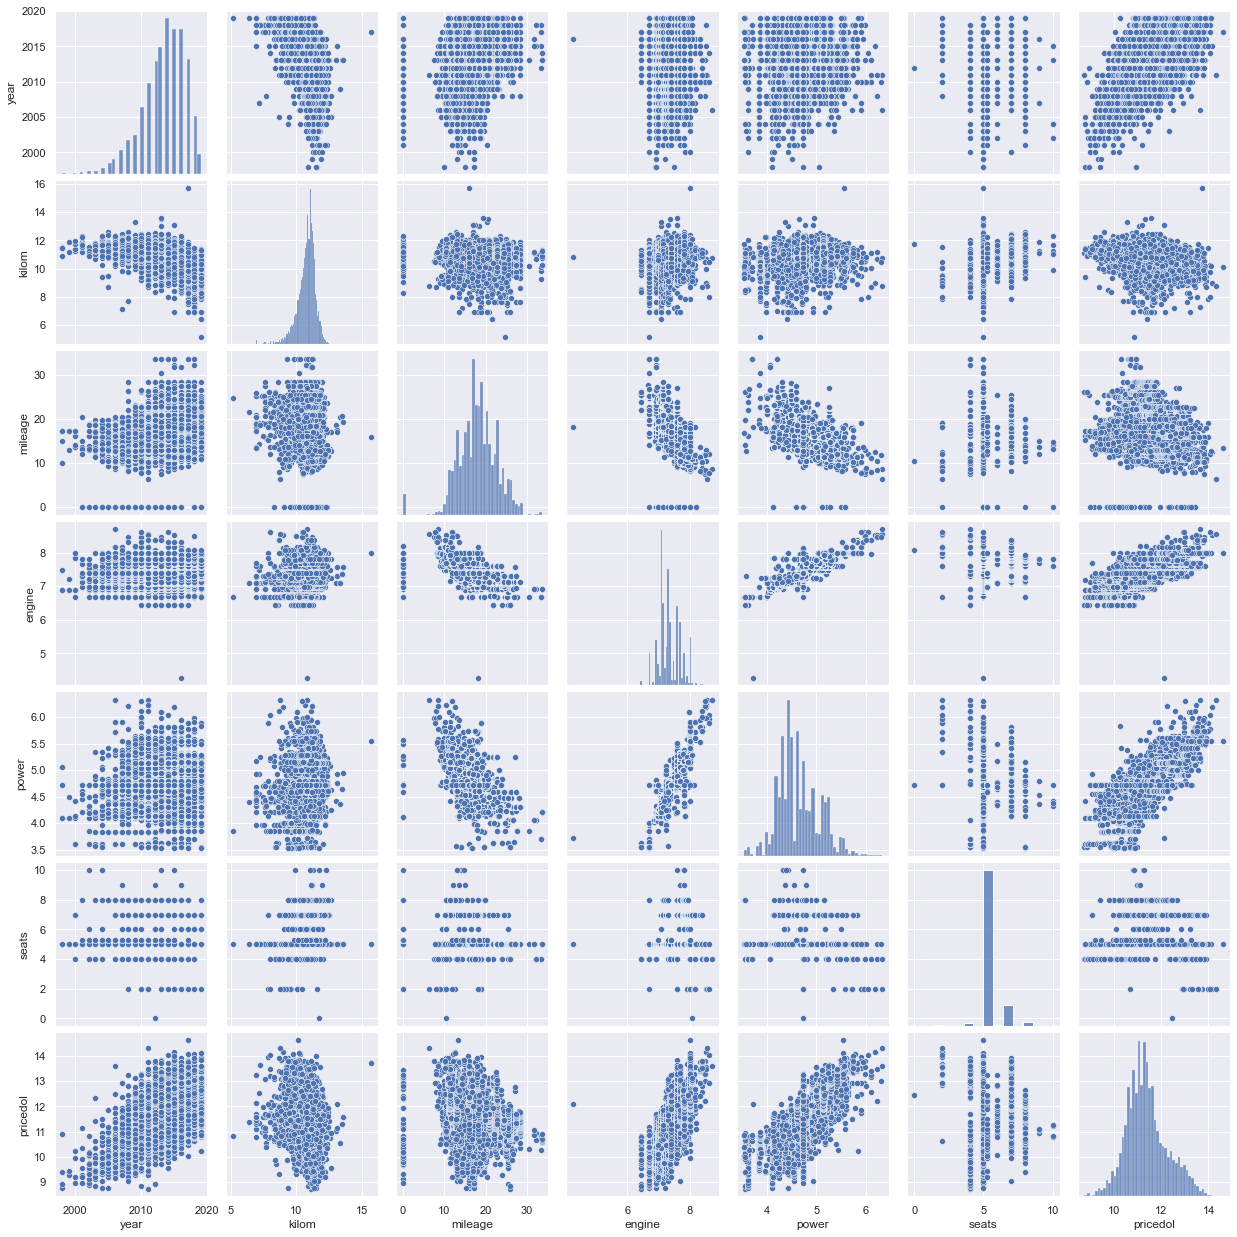

In [657]:
# Log Transformations for Skewed Distributions
df_1 = df.copy()
df_1[['engine','pricedol',"kilom","power"]] = np.log(df_1[['engine','pricedol',"kilom","power"]])
sns.set()
sns.pairplot(df_1, size = 2.5)
plt.show();

Осуществим работы с выбросами в числовых переменных: для этого запишем функцию для поиска и замены данных, выходящих за пределы 3 сигма. 

In [658]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

Запишем в наш датафрейм уже очищенные от  выбросов переменные и повторно выведем статистику.
В результате выполнения очистки можно наблядать, что показатели максимального, минимального, среднего значений, а также стандартного отклонения изменились практически по всем переменным и теперь соответствуют нормальному распределению.

In [659]:
# Outliers
df = outliers(df)
df.describe()

,year,kilom,mileage,engine,power,seats,pricedol
count,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.374555,57460.396307,18.181014,1615.392295,112.378122,5.271512,127652.041247
std,3.212293,35032.211954,4.393832,574.572565,49.287134,0.759818,132364.976260
min,2003.548973,171.000000,4.390378,72.000000,34.200000,2.860699,6160.000000
25%,2011.000000,34000.000000,15.170000,1198.000000,78.000000,5.000000,49000.000000
50%,2014.000000,53000.000000,18.150000,1493.000000,98.600000,5.000000,78960.000000
75%,2016.000000,73000.000000,21.100000,1969.000000,138.030000,5.000000,139300.000000
max,2019.000000,332544.909914,31.400380,3419.938045,272.946108,7.668249,602605.075626


Следующий шаг- кодирование категориальных переменных.
После выполнения представленной функции, записываем закодированные данные в датафрейм и выводим результат.

In [660]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [661]:
# Encoding categorical data
df = encoding_char(df)

In [662]:
df

,name,year,kilom,fuel,trans,owner,mileage,engine,power,seats,pricedol
0,0,2012.0,125000.0,0,0,0,10.500000,3197.00000,113.25305,2.860699,252000.000000
1,1,2008.0,103000.0,1,0,1,4.390378,799.00000,113.25305,2.860699,42000.000000
2,2,2014.0,14262.0,0,0,0,9.900000,1984.00000,207.80000,2.860699,382900.000000
3,2,2013.0,12100.0,0,0,0,9.900000,1984.00000,207.80000,2.860699,413000.000000
4,3,2015.0,10512.0,0,0,0,8.600000,2706.00000,265.00000,2.860699,602605.075626
...,...,...,...,...,...,...,...,...,...,...,...
6014,1874,2012.0,72000.0,1,0,2,18.480000,1621.27645,113.25305,5.278735,193900.000000
6015,1874,2012.0,90000.0,1,0,0,18.480000,1621.27645,113.25305,5.278735,203000.000000
6016,1874,2014.0,64158.0,1,0,0,18.480000,1621.27645,113.25305,5.278735,250460.000000
6017,1874,2012.0,95000.0,1,0,1,18.480000,1621.27645,113.25305,5.278735,252000.000000


Имеем подготовленный набор данных, который можно далее использовать для моделирования.

# Linear Regression

Следующий этап - моделирование.
Начнем с построения многофакторной линейной регрессии. Выведем корреляционную матрицу для визуализации и выявления наиболее значимых факторов, которые необходимо будет включить в модель. Как можно определить изначально, большее влияние имеет переменная power и engine.

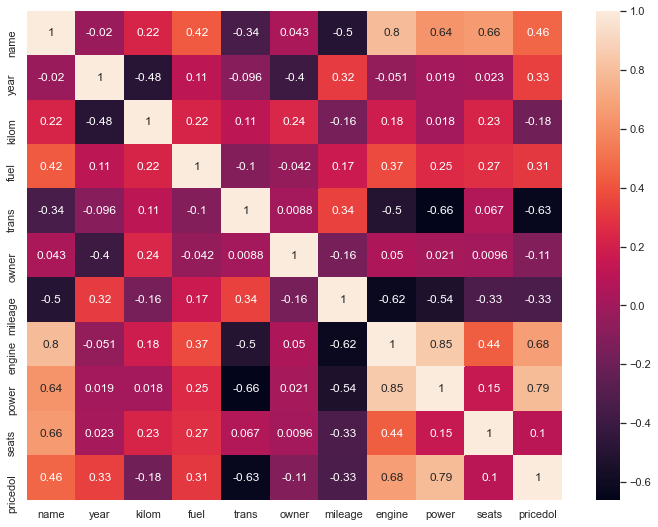

In [750]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Поделим выборку на обучающую и тестовую (20%), запишем разделенные данные.

In [733]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 10].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Построим модель многофакторной регрессии от всех переменных, включив константу, и выведем статистику по ней.

In [734]:
# Multiple Linear Regression, checking p-values
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     1597.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        05:31:38   Log-Likelihood:                -60135.
No. Observations:                4815   AIC:                         1.203e+05
Df Residuals:                    4804   BIC:                         1.204e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.407e+07    7.8e+05    -30.847      0.000   -2.56e+07   -2.25e+07
x1           -40.4024      3.616    -11.174      0.000     -47.491     -33.314
x2          1.196e+04    389.133     30.726      0.000    1.12e+04    1.27e+04
x3            -0.2618      0.034     -7.743      0.000      -0.328      -0.196
x4          3.794e+04   2334.047     16.254      0.000    3.34e+04    4.25e+04
x5         -4.215e+04   2860.261    -14.738      0.000   -4.78e+04   -3.65e+04
x6         -1675.7040   2219.832     -0.755      0.450   -6027.592    2676.184
x7         -2616.0190    348.881     -7.498      0.000   -3299.986   -1932.052
x8            37.6901      4.411      8.545      0.000      29.043      46.337
x9          1557.5057     45.836     33.980      0.000    1467.646    1647.366
x10         -690.7872   1972.204     -0.350      0.726   -4557.210    3175.636
==============================================================================
Omnibus:                      944.886   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5026.324
Skew:                           0.837   Prob(JB):                         0.00
Kurtosis:                       7.717   Cond. No.                     5.63e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Как показывает статистика,значимыми являются все переменные модели кроме "owner" и "seats". Коэффициент детерминации довольно высокий, модель значимая. 

Были поведены модификации исходной модели путем исключения/добавления факторов, незначительно точнее исходной вышла модель по 8 переменным.

Cтроим оптимальную модель, включая значимые факторы. 

In [735]:
X_train = X_train[:, [0,1, 2, 3, 4, 6, 7, 8]]
X_test = X_test[:, [0,1, 2, 3, 4, 6, 7, 8]]

In [736]:
# Fitting Optimized Multiple Regression to the Training set
from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

Получаем коэффициенты регрессии:

In [737]:
# Getting parameters
mr.coef_, mr.intercept_

(array([-4.11520475e+01,  1.20151659e+04, -2.64241712e-01,  3.79551195e+04,
        -4.23233056e+04, -2.59089414e+03,  3.74625474e+01,  1.56301301e+03]),
 -24192082.534666337)

Строим прогноз на тестовых значениях:

In [738]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

Вычисляем коэффициент детерминации, видим, что на тестовых значениях он немного ниже.

In [739]:
# Coefficient of determination R^2
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.7687312857321635, 0.7388498473578113)

Находим среднеквадратическое отклонение (т.к. число слишком большое, извлекаем корень), которое на тестовых значениях слегка превышает, что говорит о том, что модель немного переобучилась.

In [740]:
# Mean squared error
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, mr.predict(X_train))), math.sqrt(mean_squared_error(y_test, y_pred))

(64230.06731386877, 64935.018042817275)

Строим график по наиболее значимой переменной для визуализации результата. Видим, что предсказание работает не идеально, однако имеет свою точность.

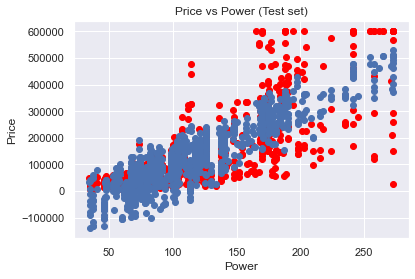

In [741]:
# Visualising the Test set results
plt.scatter(X_test[:,7], y_test, color = 'red')
plt.plot(X_test[:,7], mr.predict(X_test), 'bo')
plt.title('Price vs Power (Test set)')
plt.xlabel('Power')
plt.ylabel('Price')
plt.show()

Итак, мы получили базовую модель, от которой мы будем отталкиваться и ориентирваться в ходе посроения модели нейроной сети.

# Regression Neural Network

Наконец переходим к моделированию нейронной сети.

Для начала произведем шкалирование данных, использя выборку train оценим параметры, затем преобразуем обучающую и тестовую выборки.

In [742]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

Подключим библиотеки, необходимые для работы с нейронными сетями.

In [743]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Создаем последовательную нейронную сеть: Добавляем к ней слои, размерность входного слоя равна 8 (в соответствии с переменными предыдущей модели), число нейронов на выходном слое задаем равным 16, так как модель расширяющаяся, функция активации на первом слое-гиперболический тангенс. На втором слое количество нейронов оставляем равным 16, та же функция активации. На последнем слое используем линейную функцию активации.

In [744]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(output_dim = 16, activation = 'tanh', input_dim = 8))

# Adding the second hidden layer
rnn.add(Dense(output_dim = 16, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(output_dim = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=8, units=16)`
  """
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=16)`
  
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  # This is added back by InteractiveShellApp.init_path()


Обучаем модель партиями по 8 объектов в течении 100 эпох.

In [745]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 8, nb_epoch = 100)

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
4815/4815 [==============================] - 3s 526us/step - loss: 0.2875 - accuracy: 0.0000e+00
Epoch 2/100
4815/4815 [==============================] - 2s 402us/step - loss: 0.1873 - accuracy: 0.0000e+00
Epoch 3/100
4815/4815 [==============================] - 2s 383us/step - loss: 0.1554 - accuracy: 0.0000e+00
Epoch 4/100
4815/4815 [==============================] - 2s 385us/step - loss: 0.1387 - accuracy: 0.0000e+00
Epoch 5/100
4815/4815 [==============================] - 2s 343us/step - loss: 0.1276 - accuracy: 0.0000e+00
Epoch 6/100
4815/4815 [==============================] - 2s 348us/step - loss: 0.1223 - accuracy: 0.0000e+00
Epoch 7/100
4815/4815 [==============================] - 2s 352us/step - loss: 0.1176 - accuracy: 0.0000e+00
Epoch 8/100
4815/4815 [==============================] - 2s 408us/step - loss: 0.1155 - accuracy: 0.0000e+00
Epoch 9/100
4815/4815 [==============================] - 2s 471us/step - loss: 0.1125 - accuracy: 0.0000e+00
Epoch 10/100
4815/4

Строим прогноз на тестовом множестве.

In [746]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

Осуществляем обратное шкалирование

In [747]:
# Inversing scaling
#yhat = pd.DataFrame(yhat, columns=['yhat']) 
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

Вычмслим сумму квадратов ошибок на тестовом множестве.

In [748]:
# Mean squared error
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test, y_hat))

39293.333237903986

Видим, что MSE в модели нейронной сети (39293.33) значительно сократилась по сравнения с моделью регрессии (64935.018).

Построим график, на котором видно, что построенная модель нейронной сети сработала довольно четко по сравнению с многофакторной регрессией.

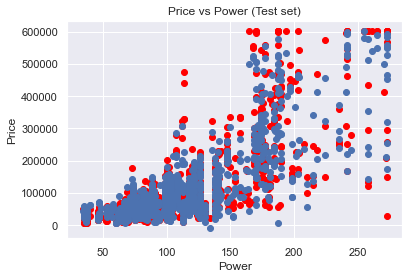

In [749]:
# Visualising the Test set results
plt.scatter(X_test[:,7], y_test, color = 'red')
plt.plot(X_test[:,7], y_hat, 'bo')
plt.title('Price vs Power (Test set)')
plt.xlabel('Power')
plt.ylabel('Price')
plt.show()

В итоге имеем качественный результат работы НС, который во много раз лучше базовой модели.